# Initial CNN Model Attempt

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Normalization
%matplotlib inline
import seaborn as sns

In [2]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")

In [3]:
Ford = Ford.iloc[14:, :]
Ford.shape

(801, 169)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.DataFrame(Ford.isna().sum()).T
# we see that the gain, average gain, average loss and loss columns are causing large numbers of NA's
# will need to come back and solve this issue.

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ford Motor Company,Ford Mustang_y,Ford F Series,Ford Bronco_y,Lincoln Navigator,Lincoln Aviator,Ford GT,dow_open,dow_high,dow_low,dow_close,dow_vol,nas_open,nas_high,nas_low,nas_close,nas_vol,Wiki_total,Google_total,Stock_total,Nas_total,Dow_total,Wiki_Moment_1,Wiki_Moment_2,Wiki_Moment_1_s,Wiki_Moment_2_s,Wiki_MAvg,Wiki_MAvg_s,Wiki_Disparity,Wiki_Disparity_s,Wiki_ROC,Wiki_ROC_s,Wiki_Rocp,Wiki_EMA,Wiki_diff,Wiki_gain,Wiki_loss,Wiki_avg_gain,Wiki_avg_loss,Wiki_rs,Wiki_RSI,Wiki_Move,Wiki_MAvg_Move,Wiki_MAvg_s_Move,Wiki_EMA_Move,Wiki_Disparity_Move,Wiki_Disparity_s_Move,Wiki_RSI_Move,Google_Moment_1,Google_Moment_2,Google_Moment_1_s,Google_Moment_2_s,Google_MAvg,Google_MAvg_s,Google_Disparity,Google_Disparity_s,Google_ROC,Google_ROC_s,Google_Rocp,Google_EMA,Google_diff,Google_gain,Google_loss,Google_avg_gain,Google_avg_loss,Google_rs,Google_RSI,Google_Move,Google_MAvg_Move,Google_MAvg_s_Move,Google_EMA_Move,Google_Disparity_Move,Google_Disparity_s_Move,Google_RSI_Move,Stock_Moment_1,Stock_Moment_2,Stock_Moment_1_s,Stock_Moment_2_s,Stock_MAvg,Stock_MAvg_s,Stock_Disparity,Stock_Disparity_s,Stock_ROC,Stock_ROC_s,Stock_Rocp,Stock_EMA,Stock_diff,Stock_gain,Stock_loss,Stock_avg_gain,Stock_avg_loss,Stock_rs,Stock_RSI,Stock_Move,Stock_MAvg_Move,Stock_MAvg_s_Move,Stock_EMA_Move,Stock_Disparity_Move,Stock_Disparity_s_Move,Stock_RSI_Move,Nas_Moment_1,Nas_Moment_2,Nas_Moment_1_s,Nas_Moment_2_s,Nas_MAvg,Nas_MAvg_s,Nas_Disparity,Nas_Disparity_s,Nas_ROC,Nas_ROC_s,Nas_Rocp,Nas_EMA,Nas_diff,Nas_gain,Nas_loss,Nas_avg_gain,Nas_avg_loss,Nas_rs,Nas_RSI,Nas_Move,Nas_MAvg_Move,Nas_MAvg_s_Move,Nas_EMA_Move,Nas_Disparity_Move,Nas_Disparity_s_Move,Nas_RSI_Move,Dow_Moment_1,Dow_Moment_2,Dow_Moment_1_s,Dow_Moment_2_s,Dow_MAvg,Dow_MAvg_s,Dow_Disparity,Dow_Disparity_s,Dow_ROC,Dow_ROC_s,Dow_Rocp,Dow_EMA,Dow_diff,Dow_gain,Dow_loss,Dow_avg_gain,Dow_avg_loss,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,0,0,0,0,0,6,6,6,6,6,6,6,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,0,0,6,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,6,6,11,11,11,6,11,11,11,76,76,76,76,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Remove any infinitly large or small values
# Ford.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop remanining NaN or null values
#Ford = Ford.dropna()
#Ford.shape


In [7]:
# Ford 1, Basic Varaibles,  
Ford_1 = Ford[Ford.columns.drop(list(Ford.filter(regex='Move')))]
Ford_1 = Ford_1[["target_1", "Volume", 
                "Wiki_total", "Google_total", 
                "nas_close", "dow_close",
                 "Close", "nas_vol", 
                 "dow_vol"
                 ]]
Ford_1.head()  

,target_1,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,,
2019-01-23,0,45196900.0,14836.0,19.500000,7025.770020,24575.619141,7.562010,2.274420e+09,318600000.0
2019-01-24,1,79516400.0,15219.0,32.625000,7073.459961,24553.240234,7.797754,2.400290e+09,320170000.0
2019-01-25,0,53098800.0,14645.0,35.500000,7164.859863,24737.199219,8.033502,2.440840e+09,376890000.0
2019-01-28,1,42116300.0,14390.0,21.958333,7085.680176,24528.220703,7.852159,2.435480e+09,347170000.0
2019-01-29,1,30485000.0,14412.0,24.750000,7028.290039,24579.960938,7.942830,2.089690e+09,330870000.0


In [8]:
# for checking NaN values

# Ford_1[Ford_1['Volume'].isnull()]
# pd.DataFrame(Ford.loc["2019-12-31"]).T

In [9]:
print(Ford_1.shape)
print(Ford_1.dropna().shape)

(801, 9)
(795, 9)


In [10]:
Ford_1 = Ford_1.dropna()
# Ford_1 = Ford_1.reset_index(drop="date")


In [11]:
#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford_1.columns)}

n = len(Ford_1)
train_f1 = Ford_1[0:int(n*0.7)]
val_f1 = Ford_1[int(n*0.7):int(n*0.9)]
test_f1 = Ford_1[int(n*0.9):]

num_features = Ford_1.shape[1]

In [12]:
f_list = ["Volume", 
            "Wiki_total", "Google_total", 
            "nas_close", "dow_close",
            "Close", "nas_vol", 
            "dow_vol"
            ]

In [13]:
#normalizing the data, may come back later to take normalization with moving averages to avoid allwoing
# the training set to have access to futre traing data
train_f1_mean = train_f1[f_list].mean()
train_f1_std = train_f1[f_list].std()

train_f1[f_list] = (train_f1[f_list] - train_f1_mean) / train_f1_std
val_f1[f_list] = (val_f1[f_list] - train_f1_mean) / train_f1_std
test_f1[f_list] = (test_f1[f_list] - train_f1_mean) / train_f1_std

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


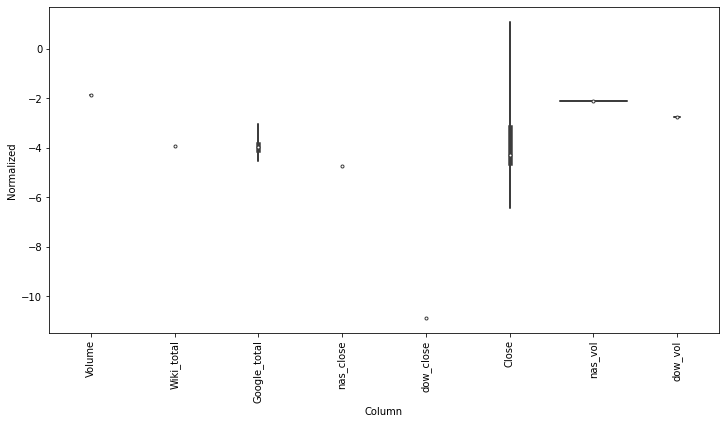

In [14]:
# Visual Distribution of the features
ford_1_std = (Ford_1[f_list] - train_f1_mean) / train_f1_std
ford_1_std = ford_1_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=ford_1_std)
_ = ax.set_xticklabels(Ford_1[f_list].keys(), rotation=90)

In [15]:
# format
# [[[1], [2], [3], [4], [5]]] [target]
# [[[2], [3], [4], [5], [6]]] [target]
# [[[3], [4], [5], [6], [7]]] [target]

def df_to_X_y2(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size): # length of data frame - window_size so it does't take empty values at the end
    row = [r for r in df_as_np[i:i+window_size]] # grabs row i and all rows above within the window size lenth
    X.append(row) # creates 3 dimentional array, (# obseravtions, # rows in window, # varibles)
    label = df_as_np[i+window_size][0] # pulls the target varaible after the window, tagrget varible needs to be column zero in this 
    y.append(label)
  return np.array(X), np.array(y)

X2, y2 = df_to_X_y2(Ford_1)
X2.shape, y2.shape

((790, 5, 9), (790,))

In [16]:
Xf1_train, yf1_train = df_to_X_y2(train_f1)
Xf1_val, yf1_val = df_to_X_y2(val_f1)
Xf1_test, yf1_test = df_to_X_y2(test_f1)

In [17]:
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, InputLayer

In [18]:
# define model
n_steps = 5
n_features = 9

model = Sequential()
model.add(Conv1D(filters=2, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(50, activation='relu')) 
model.add(Dense(2)) 

model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])

model.summary()

2022-05-08 12:06:29.156470: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 2)              38        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 2)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 390
Trainable params: 390
Non-trainable params: 0
__________________________________________________________

In [19]:
model.fit(Xf1_train, yf1_train, epochs=10,  validation_data=(Xf1_val, yf1_val))

Epoch 1/10
18/18 [==============================] - 2s 22ms/step - loss: 5.3368 - accuracy: 0.5826 - val_loss: 4.8902 - val_accuracy: 0.5909
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 4.7988 - accuracy: 0.5826 - val_loss: 4.9205 - val_accuracy: 0.5909
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 4.1160 - accuracy: 0.5808 - val_loss: 4.2299 - val_accuracy: 0.5909
Epoch 4/10
18/18 [==============================] - 0s 15ms/step - loss: 1.6960 - accuracy: 0.5554 - val_loss: 0.9980 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.9591 - accuracy: 0.4737 - val_loss: 1.5707 - val_accuracy: 0.4545
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8964 - accuracy: 0.4465 - val_loss: 1.7793 - val_accuracy: 0.4805
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8433 - accuracy: 0.4809 - val_loss: 1.8628 - val_accuracy: 0.4740
Epoch 8/10
18/18 [

In [20]:
model2 = Sequential()
model2.add(InputLayer((5, 9)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',
                   metrics=["accuracy"], )

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             1216      
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,281
Trainable params: 3,281
Non-trainable params: 0
_________________________________________________________________


In [21]:
Xf1_train

array([[[ 0.        , -0.4739521 ,  0.18967881, ..., -0.38093508,
         -0.73771455, -0.27526939],
        [ 1.        ,  0.5856816 ,  0.29548556, ..., -0.25245481,
         -0.66199991, -0.26299211],
        [ 0.        , -0.22997653,  0.13691357, ..., -0.12397298,
         -0.63760785,  0.18055406],
        [ 1.        , -0.56906734,  0.06646783, ..., -0.22280433,
         -0.64083205, -0.05185412],
        [ 1.        , -0.92819022,  0.0725455 , ..., -0.17338879,
         -0.84883528, -0.17931891]],

       [[ 1.        ,  0.5856816 ,  0.29548556, ..., -0.25245481,
         -0.66199991, -0.26299211],
        [ 0.        , -0.22997653,  0.13691357, ..., -0.12397298,
         -0.63760785,  0.18055406],
        [ 1.        , -0.56906734,  0.06646783, ..., -0.22280433,
         -0.64083205, -0.05185412],
        [ 1.        , -0.92819022,  0.0725455 , ..., -0.17338879,
         -0.84883528, -0.17931891],
        [ 0.        , -0.94606408, -0.11088969, ..., -0.12311123,
         -0.57

In [22]:
trial

NameError: name 'trial' is not defined

In [ ]:
Ford_1.to_numpy()

array([[ 0.00000000e+00,  4.51969000e+07,  1.48360000e+04, ...,
         2.27442000e+09,  3.18600000e+08, -1.45074368e-01],
       [ 1.00000000e+00,  7.95164000e+07,  1.52190000e+04, ...,
         2.40029000e+09,  3.20170000e+08,  2.35744476e-01],
       [ 0.00000000e+00,  5.30988000e+07,  1.46450000e+04, ...,
         2.44084000e+09,  3.76890000e+08,  2.35747337e-01],
       ...,
       [ 1.00000000e+00,  5.46344000e+07,  1.05020000e+04, ...,
         5.08612000e+09,  2.99790000e+08,  1.98678970e-01],
       [ 0.00000000e+00,  9.06769000e+07,  1.03150000e+04, ...,
         6.03187000e+09,  3.55050000e+08,  1.07286072e+00],
       [ 0.00000000e+00,  5.78534000e+07,  9.97700000e+03, ...,
         5.43998000e+09,  3.17320000e+08, -4.76825714e-01]])

In [ ]:
np.array(Ford_1)[0][0]

0.0